In [1]:
# 라이브러리 로드
import os
import json
import csv
import requests
import folium
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import re

In [2]:

# 현재 작업 디렉토리 경로 얻기
current_directory = os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False  # 마이너스 부호 출력 설정

In [75]:
s_data = pd.read_csv('catch_loc_updated_0630.csv')
s_data.head()

,Unnamed: 0,Name,Category,Category_1,Location,Location_1,Label,Rating,Review,avg_lunch,avg_dinner,min_lunch,max_lunch,min_dinner,max_dinner,Location_2
0,0,런던 베이글 뮤지엄 도산,"카페,디저트",카페,도산공원,강남구,웨이팅,4.4,3419,15000.0,15000.0,10000.0,20000.0,10000.0,20000.0,도산공원
1,1,산청숯불가든 마곡,돼지고기구이,한식,마곡,강서구,웨이팅,4.6,583,40000.0,40000.0,20000.0,60000.0,20000.0,60000.0,마곡
2,2,라프레플루트,"카페,디저트",카페,서울숲,성동구,웨이팅,4.3,278,20000.0,20000.0,10000.0,30000.0,10000.0,30000.0,서울숲
3,3,한소반 청계산점,"육류,고기요리",한식,청계산,서초구,웨이팅,4.3,197,15000.0,15000.0,10000.0,20000.0,10000.0,20000.0,청계산
4,4,크레이지카츠,돈가스,한식,합정,마포구,웨이팅,4.7,562,15000.0,15000.0,10000.0,20000.0,10000.0,20000.0,합정


In [121]:
location = s_data.groupby('Location_1').size().reset_index()
print(location)

   Location_1    0
0         강남구  790
1         강동구   24
2         강북구    7
3         강서구   91
4         관악구   43
5         광진구   64
6         구로구   26
7         금천구   10
8         노원구   26
9         도봉구   12
10       동대문구   32
11        동작구   49
12        마포구  417
13       서대문구   36
14        서초구  163
15        성동구  290
16        성북구   38
17        송파구  227
18        양천구   20
19       영등포구  179
20        용산구  376
21        은평구   25
22        종로구  251
23         중구  193
24        중랑구   13


In [76]:
d = s_data.copy()
d.corr()

ValueError: could not convert string to float: '런던 베이글 뮤지엄 도산'

  Location_1  4.5점 식당 개수
0        강남구         516
1        마포구         304
2        성동구         202
3        송파구         138
4       영등포구         111
5        용산구         247
6        종로구         141
7         중구         116


C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\2058433040.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate45_location, x='4.5점 식당 개수', y='Location_1', palette='cool')


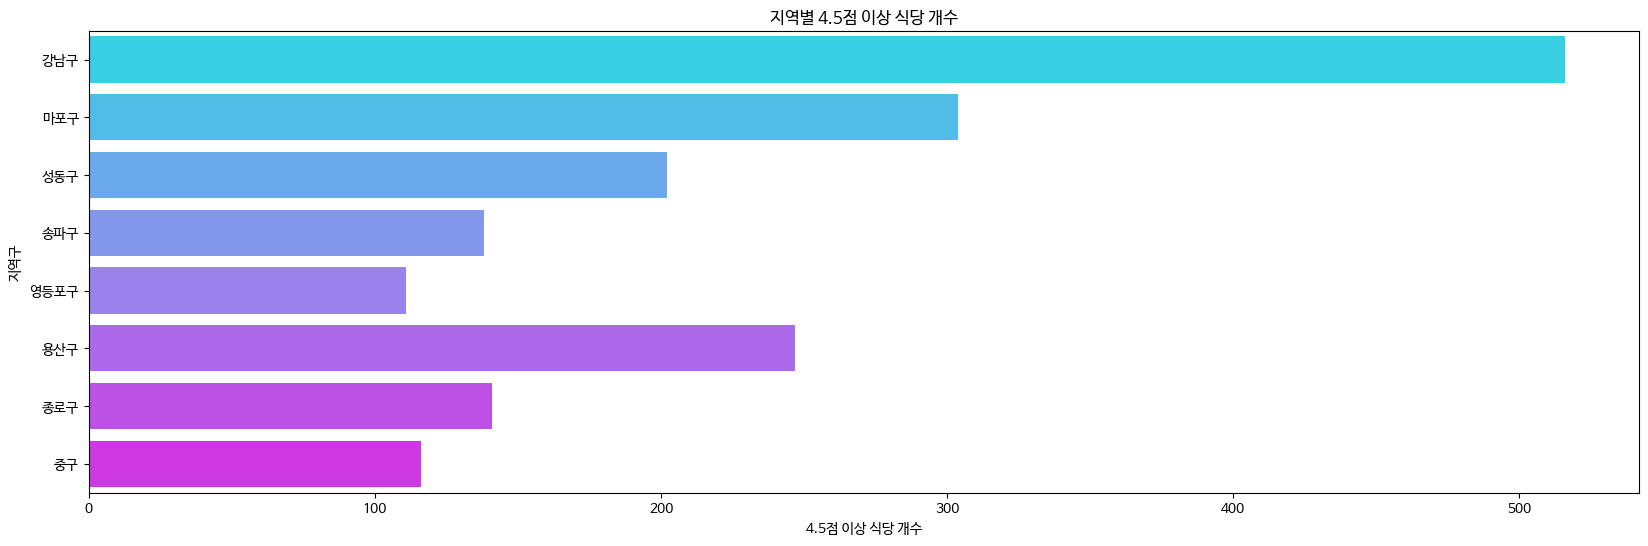

In [196]:
# 지역별 4.5점 이상 식당 개수 계산
# r_data = s_data[(s_data['Rating'] >= 4.5) & (s_data['Review'] >= 1000)]
# rate45_data = s_data[s_data['Rating'] >= 4.5]
# rate45_location = rate45_data.groupby('Location_1').size().reset_index(name='4.5점 식당 개수')
# rate45_location = rate45_location[rate45_location['4.5점 식당 개수'] >= 100]
# print(rate45_location.reset_index(name='식당 4.5'))
# 4.5점 이상 식당 필터링 및 그룹화
rate45_data = s_data[s_data['Rating'] >= 4.5
                     ]
rate45_location = rate45_data.groupby('Location_1').size().reset_index(name='4.5점 식당 개수')
rate45_location = rate45_location[rate45_location['4.5점 식당 개수'] >= 100]  # 100개 기준 대신 예시로 1개 이상
rate45_location = rate45_location.reset_index(drop=True)
# rate45_location.index = range(len(rate45_location))  # 인덱스를 0부터 8까지 설정

print(rate45_location)
# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=rate45_location, x='4.5점 식당 개수', y='Location_1', palette='cool')
plt.title('지역별 4.5점 이상 식당 개수')
plt.xlabel('4.5점 이상 식당 개수')
plt.ylabel('지역구')
plt.show()

  Location_1  리뷰 200개 식당 개수
0        강남구            268
1        마포구             82
2        서초구             33
3        성동구             83
4        송파구             42
5       영등포구             37
6        용산구            121
7        종로구             71
8         중구             46


C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\1216347820.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review200_location, x='리뷰 200개 식당 개수', y='Location_1', palette='cool')


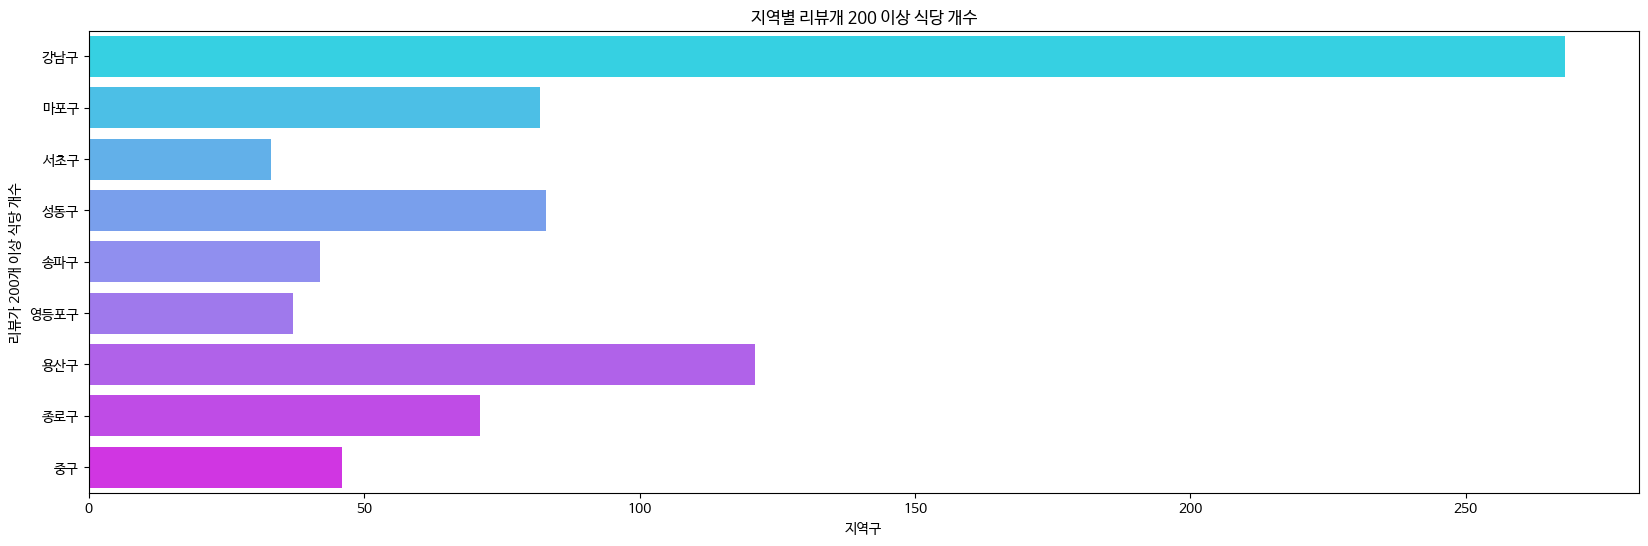

In [172]:
# 지역별 리뷰가 200 이상 식당 개수 계산
# review1000_data = s_data[s_data['Review'] >= 190]
# review1000_location = review1000_data.groupby('Location_1').size().reset_index(name='리뷰 200개 식당 개수')
review200_data = s_data[s_data['Review'] >= 200]
review200_location = review200_data.groupby('Location_1').size().reset_index(name='리뷰 200개 식당 개수')
review200_location = review200_location[review200_location['리뷰 200개 식당 개수'] >= 12]  # 100개 기준 대신 예시로 1개 이상
review200_location = review200_location.reset_index(drop=True)




# review200_location = review200_location['Location_1'].value_counts().nlargest(9)
# top_locations = r_data['Location_1'].value_counts().nlargest(3).index
print(review200_location)

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=review200_location, x='리뷰 200개 식당 개수', y='Location_1', palette='cool')
plt.title('지역별 리뷰개 200 이상 식당 개수')
plt.xlabel('지역구')
plt.ylabel('리뷰가 200개 이상 식당 개수')
plt.show()

In [173]:
# 지역별 4.5점 이상 식당 개수 계산
# rate45_data = s_data[s_data['Rating'] >= 4.5]
# rate45_location = rate45_data.groupby('Location_1').size().reset_index(name='4.5점 식당 개수')

# # print(rate45_location)

# # 지역별 리뷰가 1000 이상 식당 개수 계산
# review1000_data = s_data[s_data['Review'] >= 1000]
# review1000_location = review1000_data.groupby('Location_1').size().reset_index(name='리뷰 1000개 식당 개수')

# print(review1000_location)

# 두 개의 결과를 교차하여 지역구별로 그룹화
intersection = pd.merge(rate45_location, review200_location, on='Location_1', how='inner')

print(intersection)



  Location_1  4.5점 식당 개수  리뷰 200개 식당 개수
0        강남구         609            268
1        마포구         344             82
2        서초구         118             33
3        성동구         230             83
4        송파구         163             42
5       영등포구         126             37
6        용산구         289            121
7        종로구         163             71
8         중구         135             46


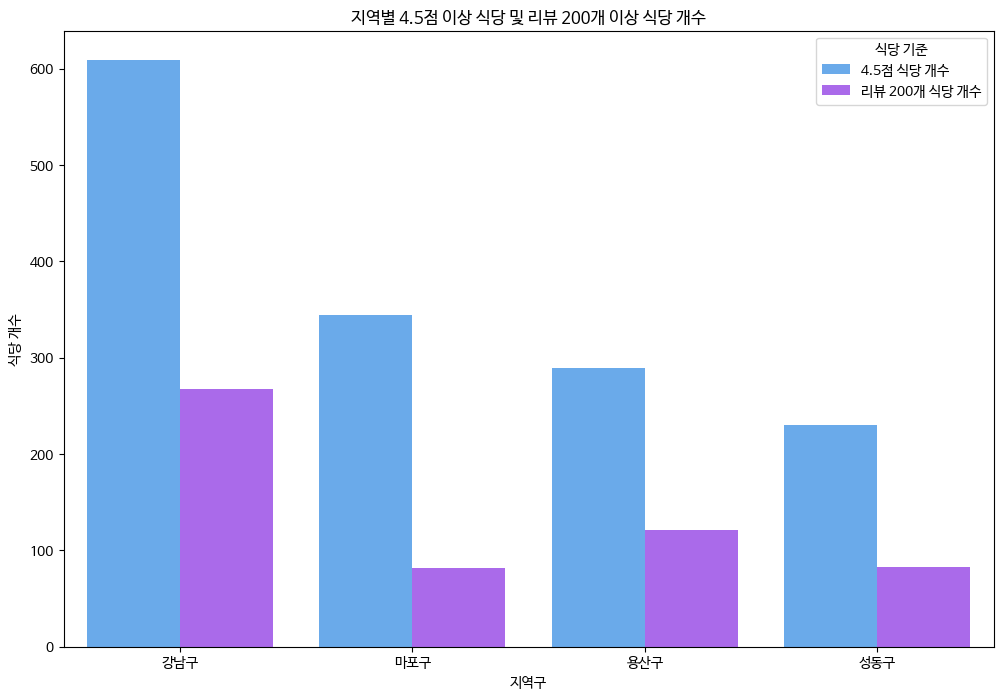

In [175]:
popular_by_location = intersection.nlargest(4, '4.5점 식당 개수')
popular_by_location = popular_by_location.reset_index(drop=True)  # 인덱스 초기화

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_by_location.melt(id_vars='Location_1', var_name='식당 기준', value_name='개수'),
            x='Location_1', y='개수', hue='식당 기준', palette='cool')
plt.title('지역별 4.5점 이상 식당 및 리뷰 200개 이상 식당 개수')
plt.xlabel('지역구')
plt.ylabel('식당 개수')
plt.legend(title='식당 기준')
plt.show()

In [73]:
s_data.info()
s_data = s_data[['Rating', "Review"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location_1  5 non-null      object 
 1   Rating      5 non-null      float64
 2   Review      5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [74]:
s_data.corr()

,Rating,Review
Rating,1.000000,-0.183254
Review,-0.183254,1.000000


In [69]:
# 지역별 4.5점 이상 식당 개수 계산
rate45_data = s_data[s_data['Rating'] >= 4.5]
rate45_location = rate45_data.groupby('Location_1').size().reset_index(name='4.5점 식당 개수')

# 지역별 리뷰가 1000 이상 식당 개수 계산
review1000_data = s_data[s_data['Review'] >= 1000]
review1000_location = review1000_data.groupby('Location_1').size().reset_index(name='리뷰 1000개 식당 개수')

# 두 개의 결과를 교차하여 지역구별로 그룹화
intersection = pd.merge(rate45_location, review1000_location, on='Location_1', how='inner')

# 지역구별로 평점과 리뷰 개수 데이터 가져오기
rating_by_location = rate45_data.groupby('Location_1')['Rating'].mean()
review_by_location = review1000_data.groupby('Location_1')['Review'].mean()

# 상관계수 계산
correlation = pd.DataFrame()
correlation['Location_1'] = intersection['Location_1']
correlation['Correlation'] = [rating_by_location.corr(review_by_location.loc[loc]) for loc in intersection['Location_1']]

print("지역별 평점과 리뷰 개수의 상관관계:")
print(correlation)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.set_index('Location_1'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('지역별 평점과 리뷰 개수 사이의 상관관계 히트맵')
plt.xlabel('리뷰 개수(Review)')
plt.ylabel('평점(Rating)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


TypeError: unsupported type: <class 'numpy.float64'>

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 예시 데이터 생성 (실제 데이터 대신 사용될 수 있음)
data = {
    'Location_1': ['강남구', '강동구', '강북구', '강서구', '관악구'],
    'Rating': [4.8, 4.7, 4.5, 4.6, 4.9],
    'Review': [1200, 800, 1500, 1100, 1300]
}
s_data = pd.DataFrame(data)

# 지역별 4.5점 이상 식당 개수 계산
rate45_data = s_data[s_data['Rating'] >= 4.5]
rate45_location = rate45_data.groupby('Location_1').size().reset_index(name='4.5점 식당 개수')

# 지역별 리뷰가 1000 이상 식당 개수 계산
review1000_data = s_data[s_data['Review'] >= 1000]
review1000_location = review1000_data.groupby('Location_1').size().reset_index(name='리뷰 1000개 식당 개수')

# 두 개의 결과를 교차하여 지역구별로 그룹화
intersection = pd.merge(rate45_location, review1000_location, on='Location_1', how='inner')

# 지역구별로 평점과 리뷰 개수 데이터 가져오기
rating_by_location = rate45_data.groupby('Location_1')['Rating'].mean()
review_by_location = review1000_data.groupby('Location_1')['Review'].mean()

# 상관계수 계산
correlation = pd.DataFrame()
correlation['Location_1'] = intersection['Location_1']
# correlation['Correlation'] = [rating_by_location.loc[loc].corr(review_by_location.loc[loc]) for loc in intersection['Location_1']]

print("지역별 평점과 리뷰 개수의 상관관계:")
print(correlation)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.set_index('Location_1'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('지역별 평점과 리뷰 개수 사이의 상관관계 히트맵')
plt.xlabel('리뷰 개수(Review)')
plt.ylabel('평점(Rating)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


지역별 평점과 리뷰 개수의 상관관계:
  Location_1
0        강남구
1        강북구
2        강서구
3        관악구


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 평점과 리뷰 개수 사이의 상관관계 계산
correlation = intersection.groupby('Location_1')[['4.5점 식당 개수', '리뷰 1000개 식당 개수']].corr().iloc[0::2,-1].reset_index().dropna()

# 피벗 테이블로 변환하여 평점과 리뷰 개수 사이의 상관관계 데이터 구성
# pivot_correlation = correlation.pivot(index='Location_1', columns='level_1', values='Review')
print(correlation)
# # 히트맵 그리기
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('평점과 리뷰 개수 사이의 상관관계 히트맵')
# plt.xlabel('리뷰 개수(Review)')
# plt.ylabel('평점(Rating)')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()


Empty DataFrame
Columns: [Location_1, level_1, 리뷰 1000개 식당 개수]
Index: []


In [ ]:
# 지역별 인기 식당 (평점 최대 3개)
popular_by_location = intersection.nlargest(4, '4.5점 식당 개수')
popular_by_location = popular_by_location.reset_index(drop=True)  # 인덱스 초기화

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_by_location.melt(id_vars='Location_1', var_name='식당 기준', value_name='개수'),
            x='Location_1', y='개수', hue='식당 기준', palette='cool')
plt.title('지역별 4.5점 이상 식당 및 리뷰 1000개 이상 식당 개수')
plt.xlabel('지역구')
plt.ylabel('식당 개수')
plt.legend(title='식당 기준')
plt.show()

ValueError: Unable to parse string "산청숯불가든 을지로" at position 70

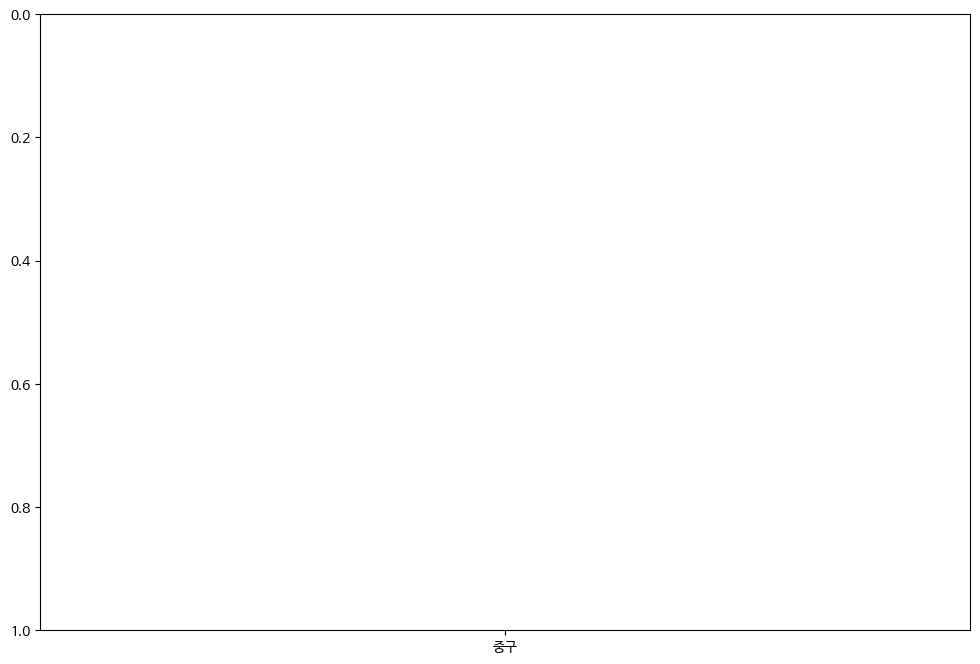

In [49]:
r_data = s_data[(s_data['Rating'] >= 4.5) & (s_data['Review'] >= 1000)]

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=r_data.melt(id_vars='Location_1', var_name='식당 기준', value_name='개수'),
            x='Location_1', y='개수', hue='식당 기준', palette='cool')
plt.title('지역별 4.5점 이상 식당 및 리뷰 1000개 이상 식당 개수')
plt.xlabel('지역구')
plt.ylabel('식당 개수')
plt.legend(title='식당 기준')
plt.show()

      Unnamed: 0              Name Category Category_1 Location Location_1  \
7              7        산청숯불가든 을지로   돼지고기구이         한식      을지로         중구   
16            16              유즈라멘       일식         일식      서울역        성동구   
93            93             스시츠바사   스시오마카세         일식       용산        용산구   
100          100               도요스   스시오마카세         일식       잠실        송파구   
119          119      샤브인서울 신용산 본점     샤브샤브         한식      신용산        용산구   
...          ...               ...      ...        ...      ...        ...   
3165        3165  조선팰리스 호텔 강남 콘스탄스       뷔페         뷔페       역삼        강남구   
3193        3193              스시우토   스시오마카세         일식       방배        서초구   
3194        3194               사토시   스시오마카세         일식   압구정로데오        강남구   
3212        3212               스시렌   스시오마카세         일식       청담        강남구   
3221        3221             이타닉가든     코스요리         퓨전       역삼        강남구   

     Label  Rating  Review avg_lunch avg_dinner  min_lunch  max

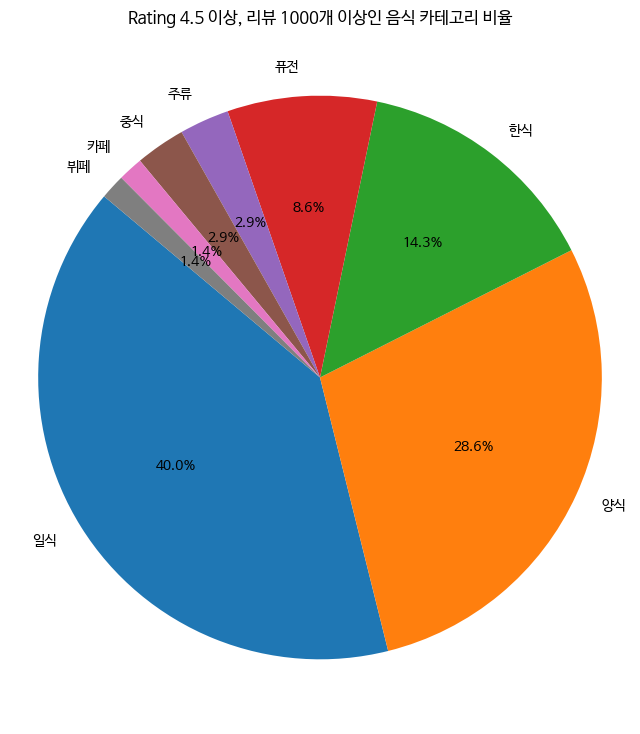

In [46]:
# 4.5 1000개 이상인 지역의 음식 카테고리
r_data = s_data[(s_data['Rating'] >= 4.5) & (s_data['Review'] >= 1000)]

# 필터링된 결과 출력
print(r_data)

# 음식 카테고리(Category_1)별 개수 계산
category_counts = r_data['Category_1'].value_counts()

# 파이차트 그리기
plt.figure(figsize=(8, 9))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating 4.5 이상, 리뷰 1000개 이상인 음식 카테고리 비율')
plt.axis('equal')  # 원형 파이차트로 만들기 위해 설정
plt.show()


In [184]:
r_data = s_data[(s_data['Rating'] >= 4.5) & (s_data['Review'] >= 200)]

# 가장 높은 지역구 3개 선택
top_locations = r_data['Location_1'].value_counts().nlargest(4).index
print(top_locations)

# 선택된 지역구들에 해당하는 데이터 필터링
filtered_data = r_data[r_data['Location_1'].isin(top_locations)]

# 각 지역구별 음식 카테고리(Category_1)별 개수 계산
category_counts = filtered_data.groupby('Location_1')['Category_1'].value_counts()

Index(['강남구', '용산구', '성동구', '마포구'], dtype='object', name='Location_1')


In [127]:
filtered_data.head()

,Unnamed: 0,Name,Category,Category_1,Location,Location_1,Label,Rating,Review,avg_lunch,avg_dinner,min_lunch,max_lunch,min_dinner,max_dinner,Location_2
93,93,스시츠바사,스시오마카세,일식,용산,용산구,웨이팅,4.5,1426,45000.0,110000.0,20000.0,70000.0,110000.0,110000.0,용산
119,119,샤브인서울 신용산 본점,샤브샤브,한식,신용산,용산구,웨이팅,4.6,1020,30000.0,30000.0,20000.0,40000.0,20000.0,40000.0,신용산/이촌
709,709,레스토랑 우오보,파스타,양식,도곡,강남구,예약,4.6,1256,가격변동,가격변동,NaN,NaN,NaN,NaN,도곡
778,778,베이스이즈나이스,베지테리안/비건,양식,마포,마포구,예약,4.9,1026,15000.0,영업안함,10000.0,20000.0,NaN,NaN,마포
885,885,헤키,일식,일식,망원,마포구,예약,4.8,1059,15000.0,15000.0,10000.0,20000.0,10000.0,20000.0,망원


In [185]:
# avg_lunch와 avg_dinner 컬럼에서 NA 값을 0으로 대체
filtered_data['avg_lunch'] = filtered_data['avg_lunch'].fillna(0)
filtered_data['avg_dinner'] = filtered_data['avg_dinner'].fillna(0)

# avg_lunch와 avg_dinner 컬럼에서 '영업안함'과 '가격변동' 값을 0으로 대체
filtered_data['avg_lunch'] = filtered_data['avg_lunch'].replace(['영업안함', '가격변동'], 0)
filtered_data['avg_dinner'] = filtered_data['avg_dinner'].replace(['영업안함', '가격변동'], 0)

# avg_lunch와 avg_dinner 컬럼을 float 타입으로 변환
filtered_data['avg_lunch'] = filtered_data['avg_lunch'].astype(float)
filtered_data['avg_dinner'] = filtered_data['avg_dinner'].astype(float)

# 변경된 데이터 확인
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 4 to 3401
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  463 non-null    int64  
 1   Name        463 non-null    object 
 2   Category    463 non-null    object 
 3   Category_1  463 non-null    object 
 4   Location    463 non-null    object 
 5   Location_1  463 non-null    object 
 6   Label       463 non-null    object 
 7   Rating      463 non-null    float64
 8   Review      463 non-null    int64  
 9   avg_lunch   463 non-null    float64
 10  avg_dinner  463 non-null    float64
 11  min_lunch   335 non-null    float64
 12  max_lunch   335 non-null    float64
 13  min_dinner  447 non-null    float64
 14  max_dinner  447 non-null    float64
 15  Location_2  463 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 61.5+ KB


C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\2514634491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['avg_lunch'] = filtered_data['avg_lunch'].fillna(0)
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\2514634491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['avg_dinner'] = filtered_data['avg_dinner'].fillna(0)
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\2514634491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Category_1
양식    69
일식    66
한식    54
퓨전    19
주류     7
중식     5
카페     1
뷔페     1
Name: count, dtype: int64
222


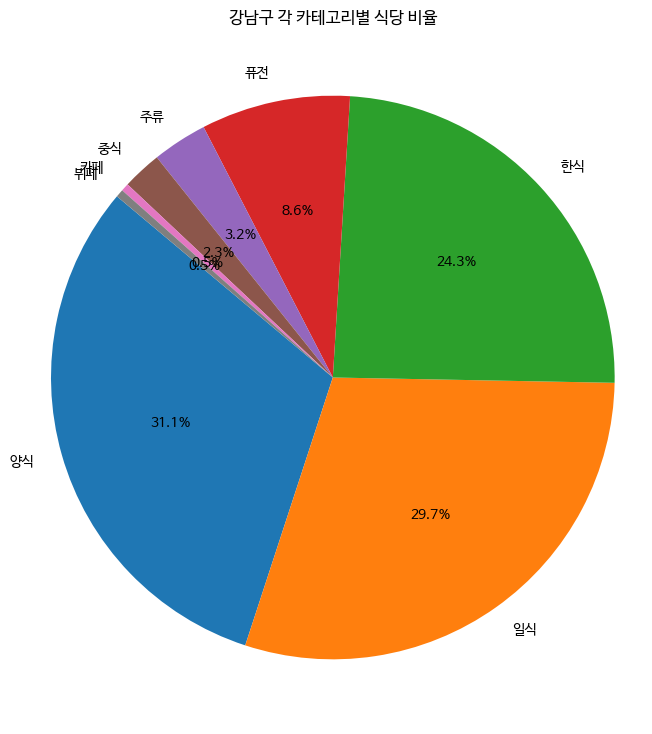

In [189]:
# '강남구'만을 필터링
gangnam_data = filtered_data[filtered_data['Location_1'] == '강남구']


# 강남구에서 각 카테고리별 식당 개수 계산
gangnam_counts = gangnam_data['Category_1'].value_counts()
print(gangnam_counts)
print(gangnam_counts.sum())
# 파이차트 그리기
plt.figure(figsize=(8, 9))
plt.pie(gangnam_counts, labels=gangnam_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('강남구 각 카테고리별 식당 비율')
plt.axis('equal')  # 원형 파이차트로 만들기 위해 설정
plt.show()

C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4047700264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4047700264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

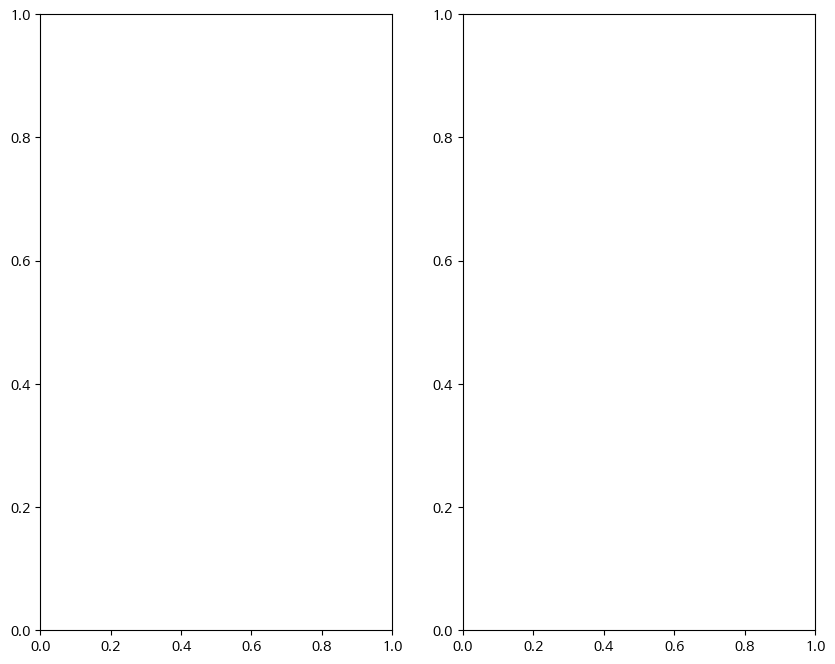

In [130]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_lunch'].max()]
dinner_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_dinner'].max()]
rating_bins = [0, 3, 4, 4.5, 5]
reviews_bins = [0, 100, 200, 500, 1000, data['Review'].max()]

gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['Rating_Binned'] = pd.cut(gangnam_data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
gangnam_data['Reviews_Binned'] = pd.cut(gangnam_data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
lunch_counts = gangnam_data['lunch_Binned'].value_counts()
price_pie = axs[0, 0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0, 0].set_title('평균 점심값')
axs[0, 0].legend(price_pie[0], lunch_counts.index, title="lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
dinner_counts = gangnam_data['dinner_Binned'].value_counts()
rating_pie = axs[0, 1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[0, 1].set_title('평균 저녁값')
axs[0, 1].legend(rating_pie[0], dinner_counts.index, title="dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# # Reviews distribution pie chart
# reviews_counts = gangnam_data['Reviews_Binned'].value_counts().sort_index()
# reviews_pie = axs[1, 0].pie(reviews_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(reviews_counts)))
# axs[1, 0].set_title('리뷰수')
# axs[1, 0].legend(reviews_pie[0], reviews_counts.index, title="Reviews Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# # Rating distribution pie chart
# rating_counts = gangnam_data['Rating_Binned'].value_counts()
# brand_pie = axs[1, 1].pie(rating_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
# axs[1, 1].set_title('평점')
# axs[1, 1].legend(brand_pie[0], rating_counts.index, title="Rating", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))


C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\1360527145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\1360527145.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\

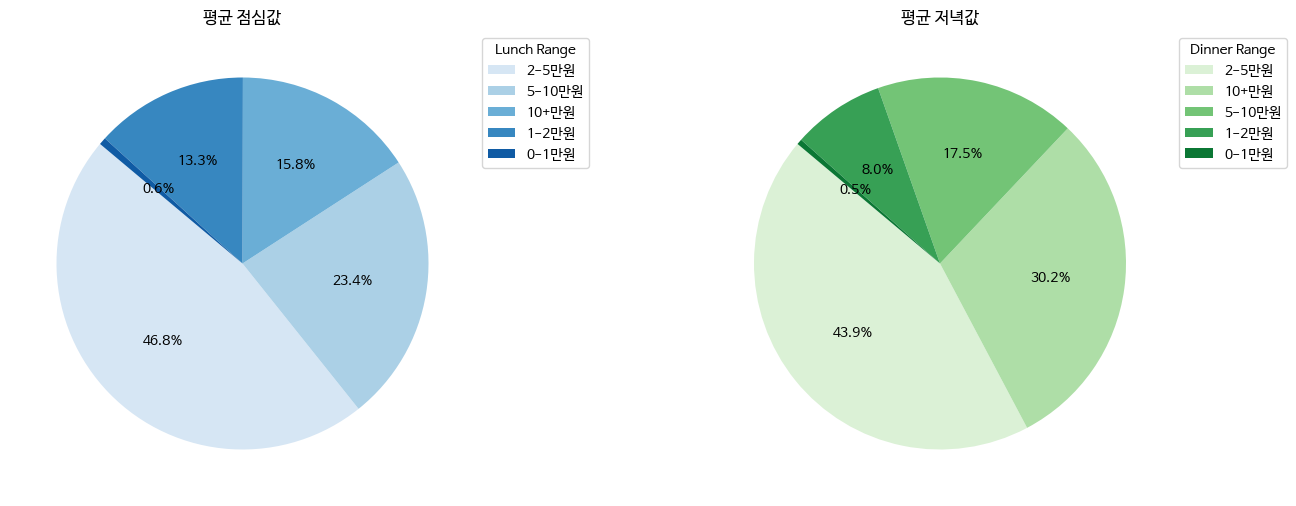

In [187]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_lunch'].max() + 1]
dinner_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_dinner'].max() + 1]
rating_bins = [0, 3, 4, 4.5, 5]
reviews_bins = [0, 100, 200, 500, 1000, gangnam_data['Review'].max() + 1]

gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['Rating_Binned'] = pd.cut(gangnam_data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
gangnam_data['Reviews_Binned'] = pd.cut(gangnam_data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.5)

# Lunch price distribution pie chart
lunch_counts = gangnam_data['lunch_Binned'].value_counts()
price_pie = axs[0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0].set_title('평균 점심값')
axs[0].legend(price_pie[0], lunch_counts.index, title="Lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Dinner price distribution pie chart
dinner_counts = gangnam_data['dinner_Binned'].value_counts()
rating_pie = axs[1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[1].set_title('평균 저녁값')
axs[1].legend(rating_pie[0], dinner_counts.index, title="Dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [188]:
gangnam_data.head(22)
g = gangnam_data[['Name', 'Category', 'Category_1', 'Location', 'Location_1', 'Label', 'Rating', 'Review', 'avg_lunch', 'avg_dinner']]
g.reset_index(drop=True)

,Name,Category,Category_1,Location,Location_1,Label,Rating,Review,avg_lunch,avg_dinner
0,하이디라오 서초점,중식,중식,강남,강남구,웨이팅,4.7,894,40000.0,40000.0
1,오제제 강남점,일식,일식,강남,강남구,웨이팅,4.6,410,20000.0,20000.0
2,떡도리탕 강남본점,"닭,오리요리",한식,강남,강남구,웨이팅,4.5,913,15000.0,15000.0
3,광평 평양냉면갈비 삼성본점,"육류,고기요리",한식,삼성,강남구,웨이팅,4.6,561,45000.0,45000.0
4,한미옥 청담본점,"육류,고기요리",한식,청담,강남구,웨이팅,4.5,227,40000.0,50000.0
...,...,...,...,...,...,...,...,...,...,...
217,청기와타운 신사역점,"육류,고기요리",한식,신사,강남구,예약-웨이팅,4.7,284,25000.0,25000.0
218,심퍼티쿠시 가로수길점,유러피안음식,양식,가로수길,강남구,예약-웨이팅,4.6,852,35000.0,35000.0
219,한미옥 청담본점,"육류,고기요리",한식,청담,강남구,예약-웨이팅,4.5,225,40000.0,50000.0
220,하이디라오 서초점,중식,중식,강남,강남구,예약-웨이팅,4.7,894,40000.0,40000.0


Category_1
양식    25
일식    21
한식    11
주류     5
중식     5
카페     1
퓨전     1
Name: count, dtype: int64
69


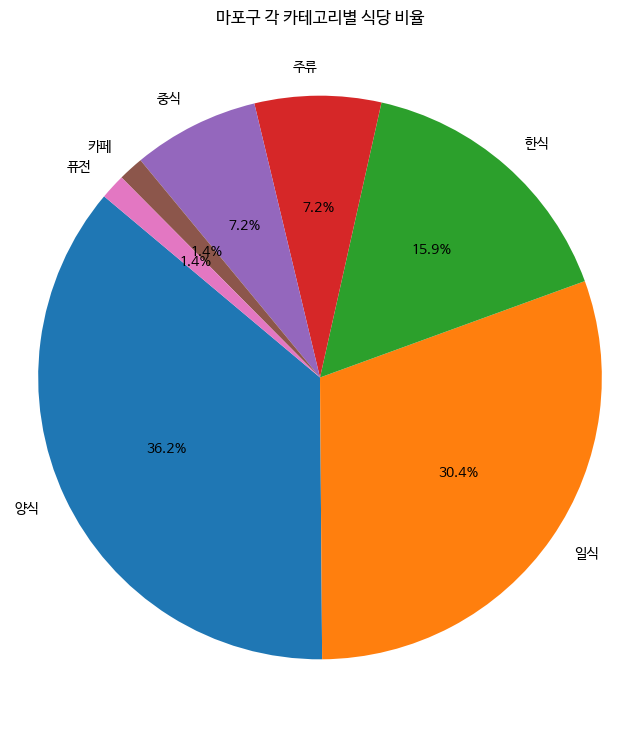

In [191]:
# '마포구'만을 필터링
mapo_data = filtered_data[filtered_data['Location_1'] == '마포구']

# 강남구에서 각 카테고리별 식당 개수 계산
mapo_counts = mapo_data['Category_1'].value_counts()
print(mapo_counts)
print(mapo_counts.sum())
# 파이차트 그리기
plt.figure(figsize=(8, 9))
plt.pie(mapo_counts, labels=mapo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('마포구 각 카테고리별 식당 비율')
plt.axis('equal')  # 원형 파이차트로 만들기 위해 설정
plt.show()

C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4144566842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4144566842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\

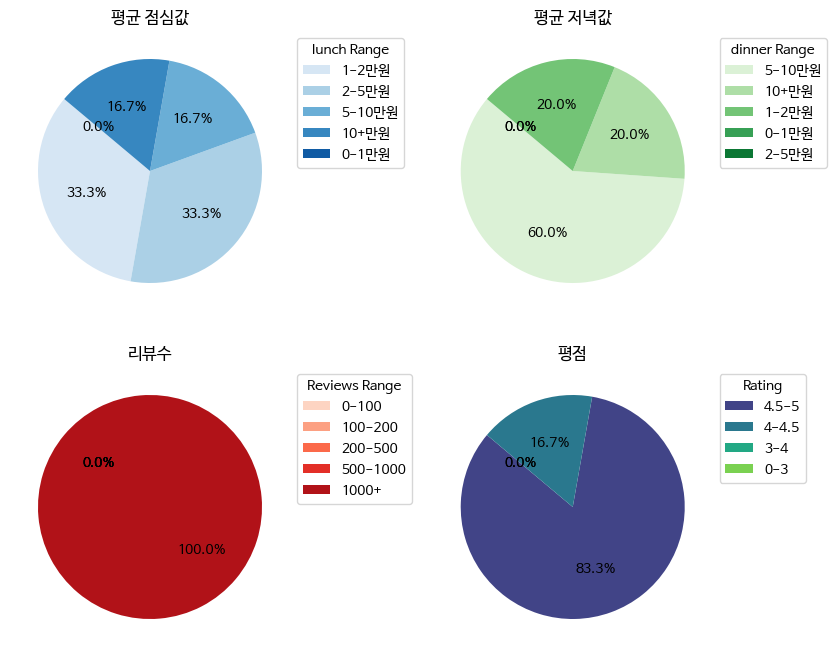

In [116]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_lunch'].max()]
dinner_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_dinner'].max()]
rating_bins = [0, 3, 4, 4.5, 5]
reviews_bins = [0, 100, 200, 500, 1000, data['Review'].max()]

gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['Rating_Binned'] = pd.cut(gangnam_data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
gangnam_data['Reviews_Binned'] = pd.cut(gangnam_data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
lunch_counts = gangnam_data['lunch_Binned'].value_counts()
price_pie = axs[0, 0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0, 0].set_title('평균 점심값')
axs[0, 0].legend(price_pie[0], lunch_counts.index, title="lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
dinner_counts = gangnam_data['dinner_Binned'].value_counts()
rating_pie = axs[0, 1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[0, 1].set_title('평균 저녁값')
axs[0, 1].legend(rating_pie[0], dinner_counts.index, title="dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Reviews distribution pie chart
reviews_counts = gangnam_data['Reviews_Binned'].value_counts().sort_index()
reviews_pie = axs[1, 0].pie(reviews_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(reviews_counts)))
axs[1, 0].set_title('리뷰수')
axs[1, 0].legend(reviews_pie[0], reviews_counts.index, title="Reviews Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
rating_counts = gangnam_data['Rating_Binned'].value_counts()
brand_pie = axs[1, 1].pie(rating_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
axs[1, 1].set_title('평점')
axs[1, 1].legend(brand_pie[0], rating_counts.index, title="Rating", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\1159705676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapo_data['lunch_Binned'] = pd.cut(mapo_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\1159705676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapo_data['dinner_Binned'] = pd.cut(mapo_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])


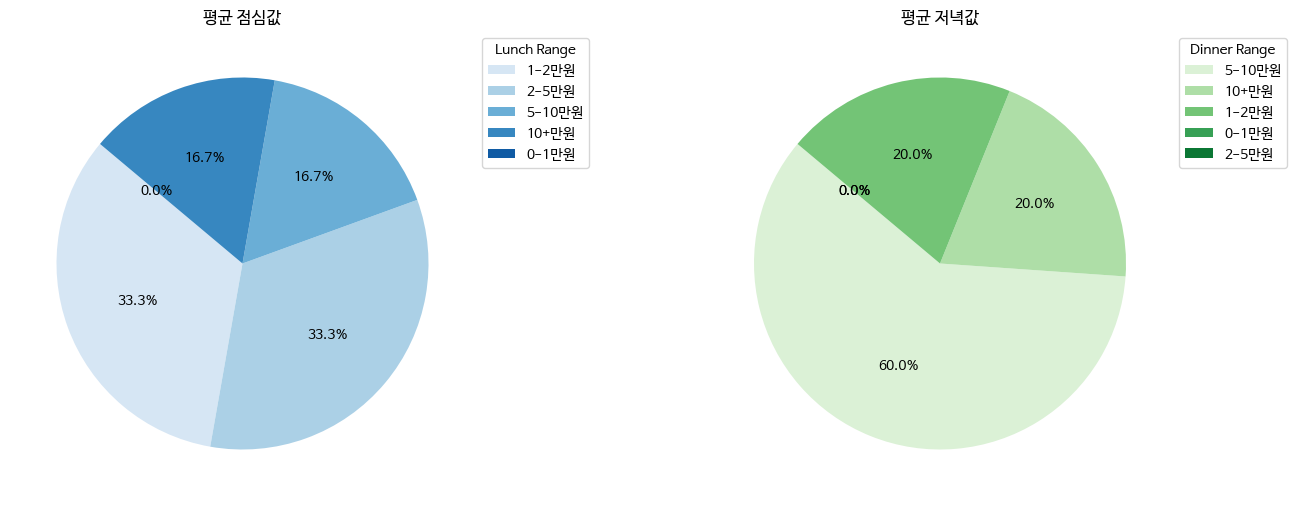

In [183]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, mapo_data['avg_lunch'].max() + 1]
dinner_bins = [0, 10000, 20000, 50000, 100000, mapo_data['avg_dinner'].max() + 1]
# rating_bins = [0, 3, 4, 4.5, 5]
# reviews_bins = [0, 100, 200, 500, 1000, gangnam_data['Review'].max() + 1]

mapo_data['lunch_Binned'] = pd.cut(mapo_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
mapo_data['dinner_Binned'] = pd.cut(mapo_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
# gangnam_data['Rating_Binned'] = pd.cut(gangnam_data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
# gangnam_data['Reviews_Binned'] = pd.cut(gangnam_data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.5)

# Lunch price distribution pie chart
lunch_counts = mapo_data['lunch_Binned'].value_counts()
price_pie = axs[0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0].set_title('평균 점심값')
axs[0].legend(price_pie[0], lunch_counts.index, title="Lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Dinner price distribution pie chart
dinner_counts = mapo_data['dinner_Binned'].value_counts()
rating_pie = axs[1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[1].set_title('평균 저녁값')
axs[1].legend(rating_pie[0], dinner_counts.index, title="Dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Category_1
양식       43
일식       25
한식       11
아시아음식     6
주류        6
퓨전        5
중식        3
육류        1
Name: count, dtype: int64
100


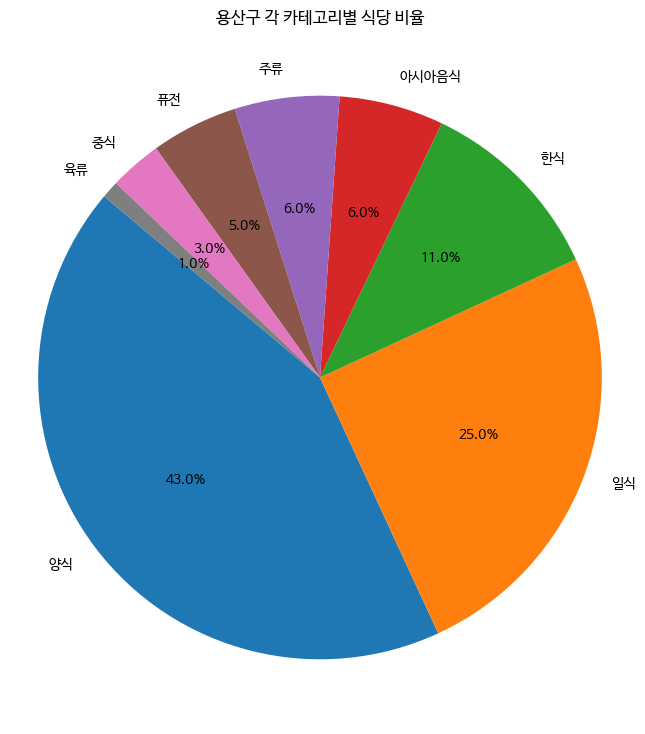

In [193]:
# '강남구'만을 필터링
yong_data = filtered_data[filtered_data['Location_1'] == '용산구']

# 강남구에서 각 카테고리별 식당 개수 계산
youg_counts = yong_data['Category_1'].value_counts()
print(youg_counts)
print(youg_counts.sum())
# 파이차트 그리기
plt.figure(figsize=(8, 9))
plt.pie(youg_counts, labels=youg_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('용산구 각 카테고리별 식당 비율')
plt.axis('equal')  # 원형 파이차트로 만들기 위해 설정
plt.show()

C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4144566842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\AppData\Local\Temp\ipykernel_46484\4144566842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
C:\Users\RYS\

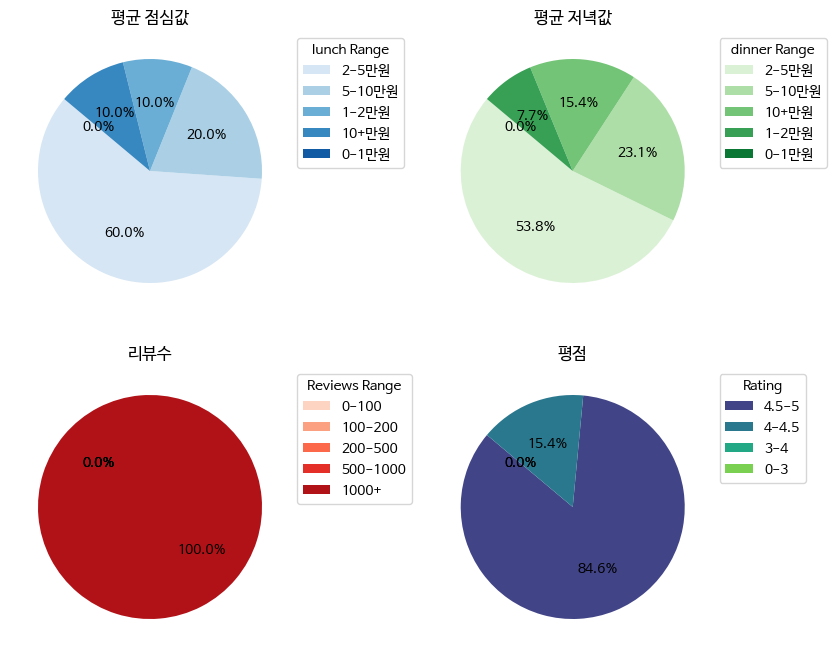

In [119]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_lunch'].max()]
dinner_bins = [0, 10000, 20000, 50000, 100000, gangnam_data['avg_dinner'].max()]
rating_bins = [0, 3, 4, 4.5, 5]
reviews_bins = [0, 100, 200, 500, 1000, data['Review'].max()]

gangnam_data['lunch_Binned'] = pd.cut(gangnam_data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['dinner_Binned'] = pd.cut(gangnam_data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
gangnam_data['Rating_Binned'] = pd.cut(gangnam_data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
gangnam_data['Reviews_Binned'] = pd.cut(gangnam_data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
lunch_counts = gangnam_data['lunch_Binned'].value_counts()
price_pie = axs[0, 0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0, 0].set_title('평균 점심값')
axs[0, 0].legend(price_pie[0], lunch_counts.index, title="lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
dinner_counts = gangnam_data['dinner_Binned'].value_counts()
rating_pie = axs[0, 1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[0, 1].set_title('평균 저녁값')
axs[0, 1].legend(rating_pie[0], dinner_counts.index, title="dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Reviews distribution pie chart
reviews_counts = gangnam_data['Reviews_Binned'].value_counts().sort_index()
reviews_pie = axs[1, 0].pie(reviews_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(reviews_counts)))
axs[1, 0].set_title('리뷰수')
axs[1, 0].legend(reviews_pie[0], reviews_counts.index, title="Reviews Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
rating_counts = gangnam_data['Rating_Binned'].value_counts()
brand_pie = axs[1, 1].pie(rating_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
axs[1, 1].set_title('평점')
axs[1, 1].legend(brand_pie[0], rating_counts.index, title="Rating", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:
# 4.5 1000개 이상인 지역의 음식 카테고리내 평균 가격

In [105]:
# load dataset
data = pd.read_csv('catch_loc_updated_0630.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3402 non-null   int64  
 1   Name        3402 non-null   object 
 2   Category    3402 non-null   object 
 3   Category_1  3402 non-null   object 
 4   Location    3402 non-null   object 
 5   Location_1  3402 non-null   object 
 6   Label       3402 non-null   object 
 7   Rating      3402 non-null   float64
 8   Review      3402 non-null   int64  
 9   avg_lunch   3401 non-null   object 
 10  avg_dinner  3402 non-null   object 
 11  min_lunch   2304 non-null   float64
 12  max_lunch   2304 non-null   float64
 13  min_dinner  3298 non-null   float64
 14  max_dinner  3298 non-null   float64
 15  Location_2  3402 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 425.4+ KB


In [106]:
# avg_lunch와 avg_dinner 컬럼에서 NA 값을 0으로 대체
data['avg_lunch'] = data['avg_lunch'].fillna(0)
data['avg_dinner'] = data['avg_dinner'].fillna(0)

# avg_lunch와 avg_dinner 컬럼에서 '영업안함'과 '가격변동' 값을 0으로 대체
data['avg_lunch'] = data['avg_lunch'].replace(['영업안함', '가격변동'], 0)
data['avg_dinner'] = data['avg_dinner'].replace(['영업안함', '가격변동'], 0)

# avg_lunch와 avg_dinner 컬럼을 float 타입으로 변환
data['avg_lunch'] = data['avg_lunch'].astype(float)
data['avg_dinner'] = data['avg_dinner'].astype(float)

# 변경된 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3402 non-null   int64  
 1   Name        3402 non-null   object 
 2   Category    3402 non-null   object 
 3   Category_1  3402 non-null   object 
 4   Location    3402 non-null   object 
 5   Location_1  3402 non-null   object 
 6   Label       3402 non-null   object 
 7   Rating      3402 non-null   float64
 8   Review      3402 non-null   int64  
 9   avg_lunch   3402 non-null   float64
 10  avg_dinner  3402 non-null   float64
 11  min_lunch   2304 non-null   float64
 12  max_lunch   2304 non-null   float64
 13  min_dinner  3298 non-null   float64
 14  max_dinner  3298 non-null   float64
 15  Location_2  3402 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 425.4+ KB


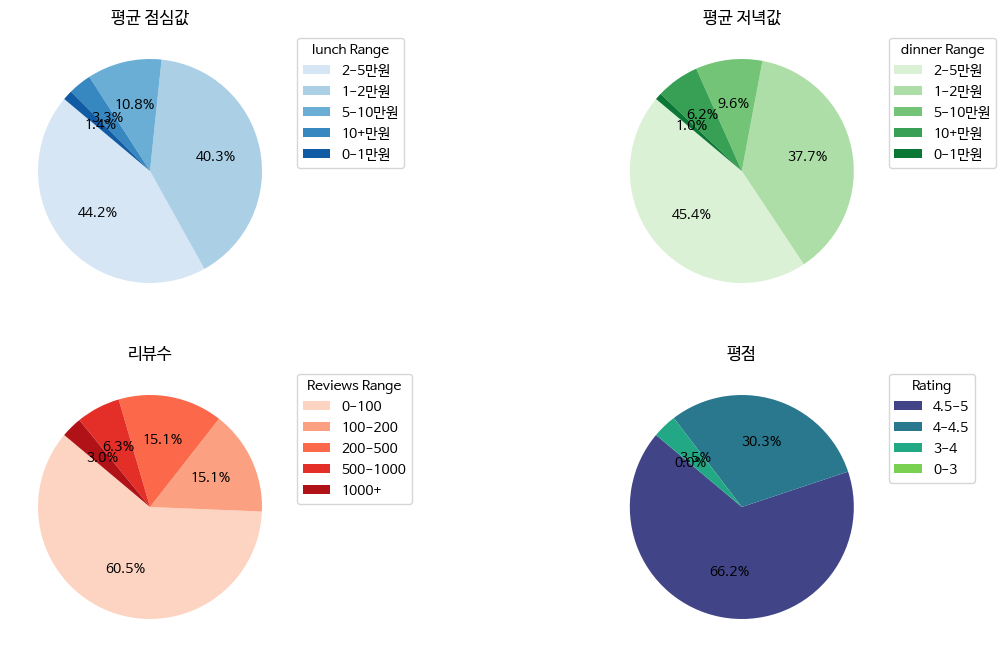

In [107]:
# 가격, 평점, 리뷰 수 범주화
lunch_bins = [0, 10000, 20000, 50000, 100000, data['avg_lunch'].max()]
dinner_bins = [0, 10000, 20000, 50000, 100000, data['avg_dinner'].max()]
rating_bins = [0, 3, 4, 4.5, 5]
reviews_bins = [0, 100, 200, 500, 1000, data['Review'].max()]

data['lunch_Binned'] = pd.cut(data['avg_lunch'], bins=lunch_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
data['dinner_Binned'] = pd.cut(data['avg_dinner'], bins=dinner_bins, labels=['0-1만원', '1-2만원', '2-5만원', '5-10만원', '10+만원'])
data['Rating_Binned'] = pd.cut(data['Rating'], bins=rating_bins, labels=['0-3', '3-4', '4-4.5', '4.5-5'])
data['Reviews_Binned'] = pd.cut(data['Review'], bins=reviews_bins, labels=['0-100', '100-200', '200-500', '500-1000', '1000+'])

# Plotting the distribution of binned Price, Rating, Reviews and Brand distribution
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
lunch_counts = data['lunch_Binned'].value_counts()
price_pie = axs[0, 0].pie(lunch_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(lunch_counts)))
axs[0, 0].set_title('평균 점심값')
axs[0, 0].legend(price_pie[0], lunch_counts.index, title="lunch Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
dinner_counts = data['dinner_Binned'].value_counts()
rating_pie = axs[0, 1].pie(dinner_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens', len(dinner_counts)))
axs[0, 1].set_title('평균 저녁값')
axs[0, 1].legend(rating_pie[0], dinner_counts.index, title="dinner Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Reviews distribution pie chart
reviews_counts = data['Reviews_Binned'].value_counts().sort_index()
reviews_pie = axs[1, 0].pie(reviews_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(reviews_counts)))
axs[1, 0].set_title('리뷰수')
axs[1, 0].legend(reviews_pie[0], reviews_counts.index, title="Reviews Range", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Rating distribution pie chart
rating_counts = data['Rating_Binned'].value_counts()
brand_pie = axs[1, 1].pie(rating_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
axs[1, 1].set_title('평점')
axs[1, 1].legend(brand_pie[0], rating_counts.index, title="Rating", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))


In [ ]:
# 가격 범주화
price_bins = [0, 500000, 1000000, 1500000, 2000000, data['Price'].max()]
price_labels = ['0-0.5M', '0.5-1M', '1-1.5M', '1.5-2M', '2M+']
data['Price_Binned'] = pd.cut(data['Price'], bins=price_bins, labels=price_labels)

# 브랜드별 평균 가격 계산
brand_avg_price = data.groupby('Brand')['Price'].mean().reset_index()

# 브랜드별 가격 분포 시각화
fig, ax1 = plt.subplots(figsize=(14, 8))

# 막대그래프: 브랜드별 가격 범주 분포
sns.countplot(x='Brand', hue='Price_Binned', data=data, palette=sns.color_palette('Dark2'), ax=ax1)
ax1.set_xlabel('Brand')
ax1.set_ylabel('Count')
ax1.set_title('브랜드별 범주화된 가격 분포와 평균 가격')

# 꺾은선 그래프: 브랜드별 평균가격
ax2 = ax1.twinx()
sns.lineplot(x='Brand', y='Price', data=brand_avg_price, marker='o', color='purple', ax=ax2)
ax2.set_ylabel('Average Price')

# 범례와 레이아웃 조정
ax1.legend(title='Price Range', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()